# Lin Reg eg 1 - 1000 Companies dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\ysaru\\Desktop\\Datasets\\1000_Companies.csv")
#X = companies.iloc[:, :-1]
#y = companies.iloc[:, 4]

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
data.shape

(1000, 5)

## ------------------------------- Graphs ---------------------------

<Axes: xlabel='State', ylabel='count'>

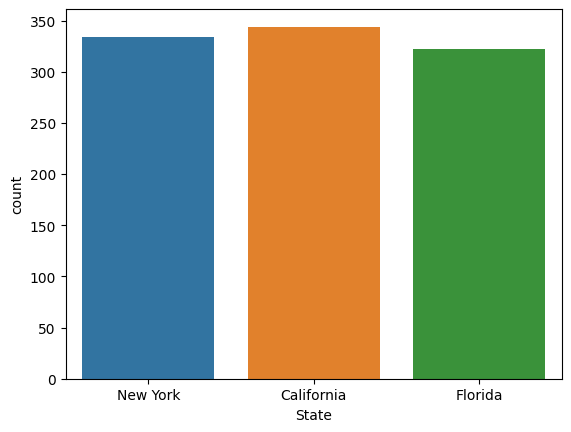

In [3]:
sns.countplot(x='State', data=data)

<Axes: xlabel='State', ylabel='Profit'>

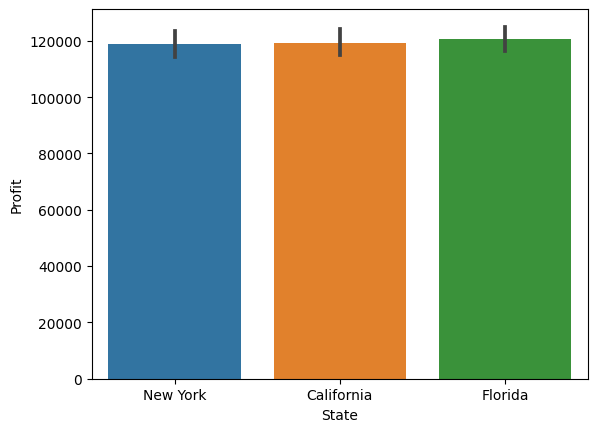

In [4]:
sns.barplot(x='State', y='Profit', data=data)

<Axes: xlabel='Profit'>

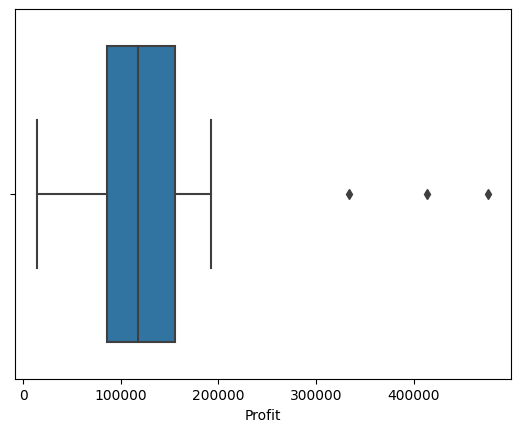

In [5]:
sns.boxplot(x='Profit', data=data)

<Axes: xlabel='State', ylabel='R&D Spend'>

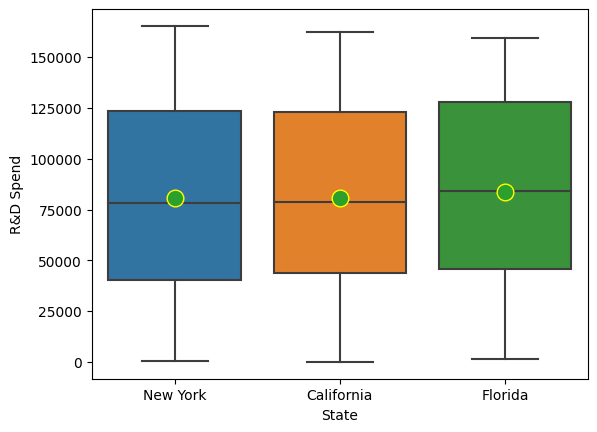

In [6]:
sns.boxplot(x='State', y='R&D Spend', showmeans=True, data=data,
            meanprops = {'marker':'o', 'markeredgecolor':'yellow', 'markersize':12})

<Axes: xlabel='State', ylabel='Administration'>

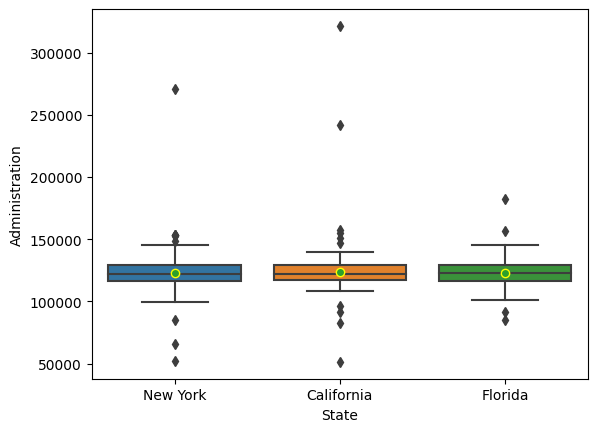

In [7]:
sns.boxplot(x='State', y='Administration', showmeans=True, data=data,
            meanprops = {'marker':'o', 'markeredgecolor':'yellow', 'markersize':6})

<Axes: xlabel='State', ylabel='Marketing Spend'>

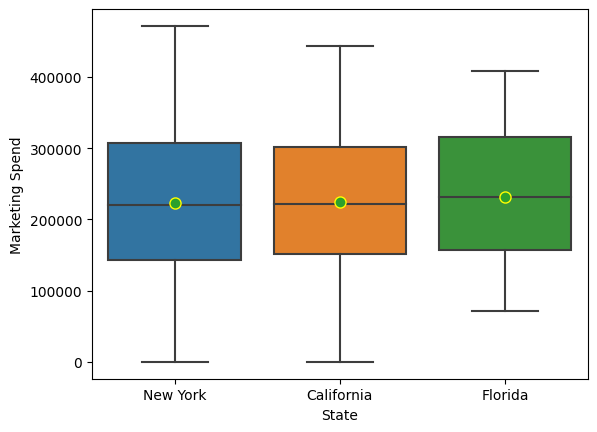

In [8]:
sns.boxplot(x='State', y='Marketing Spend', data=data, showmeans=True,
            meanprops = {'marker':'o', 'markeredgecolor':'yellow', 'markersize':8})

In [12]:
corr = data.loc(0:999,['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']).corr()

SyntaxError: invalid syntax (3956985545.py, line 1)

In [14]:
data1 = data.copy()
data1.drop('State', axis=1, inplace=True)
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [15]:
data1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<Axes: >

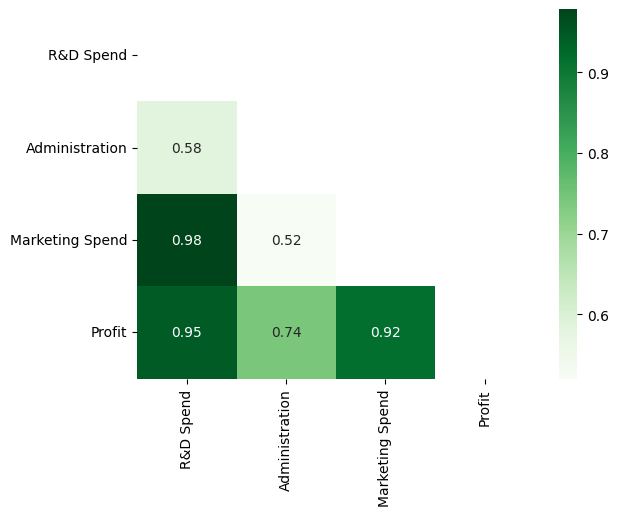

In [16]:
mask = np.triu(np.ones_like(data1.corr()))

sns.heatmap(data1.corr(), mask=mask, annot=True, cmap='Greens')

C:\Users\ysaru\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


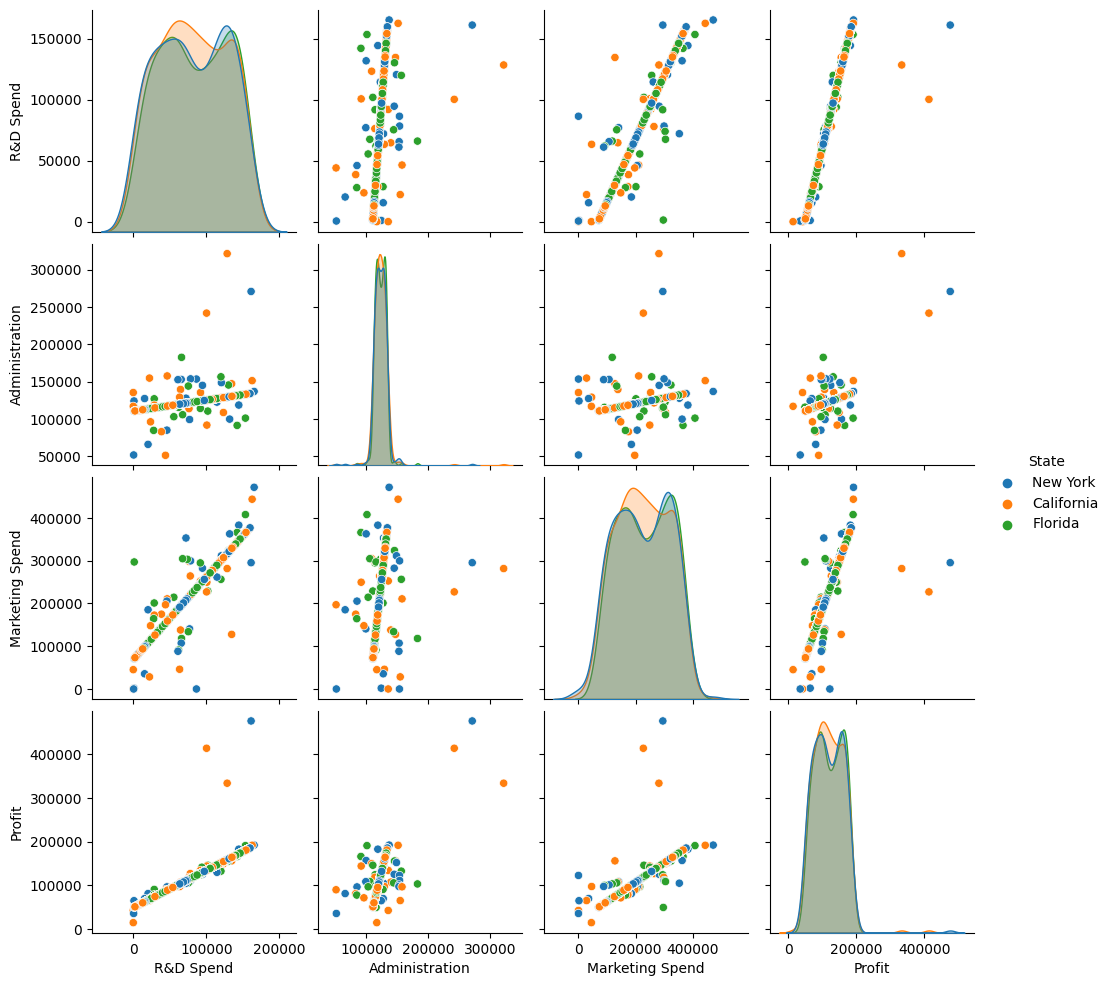

In [17]:
sns.pairplot(data=data, hue='State')

<Axes: xlabel='R&D Spend', ylabel='Count'>

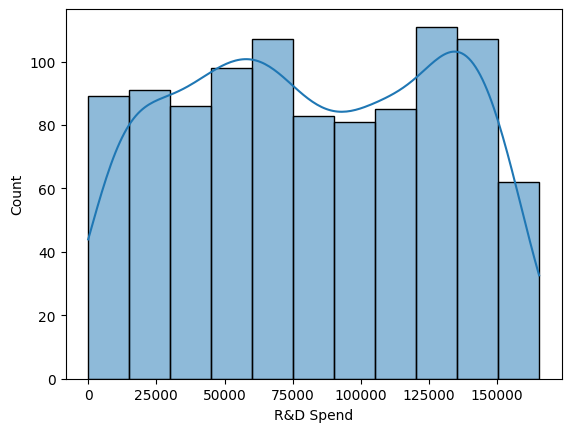

In [18]:
sns.histplot(x='R&D Spend', data=data, kde=True)

### ---------------------------- Graphs ------------------------------------

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [20]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [21]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [22]:
#data2 = data.copy()
#data2.drop(['State'], axis=1, inplace=True)
#corr = data2.corr()
#corr

In [23]:
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [24]:
corr = data1.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


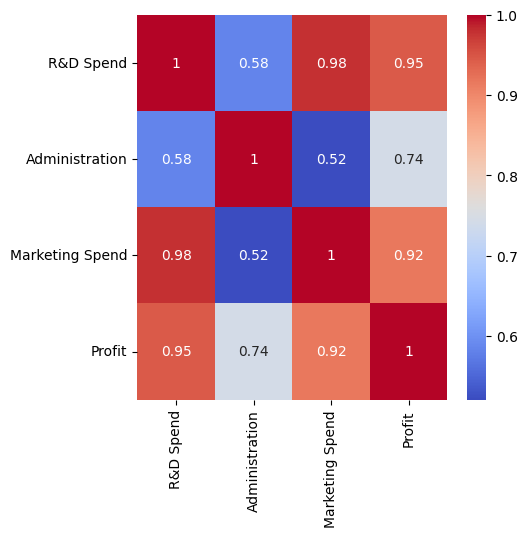

In [25]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

C:\Users\ysaru\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


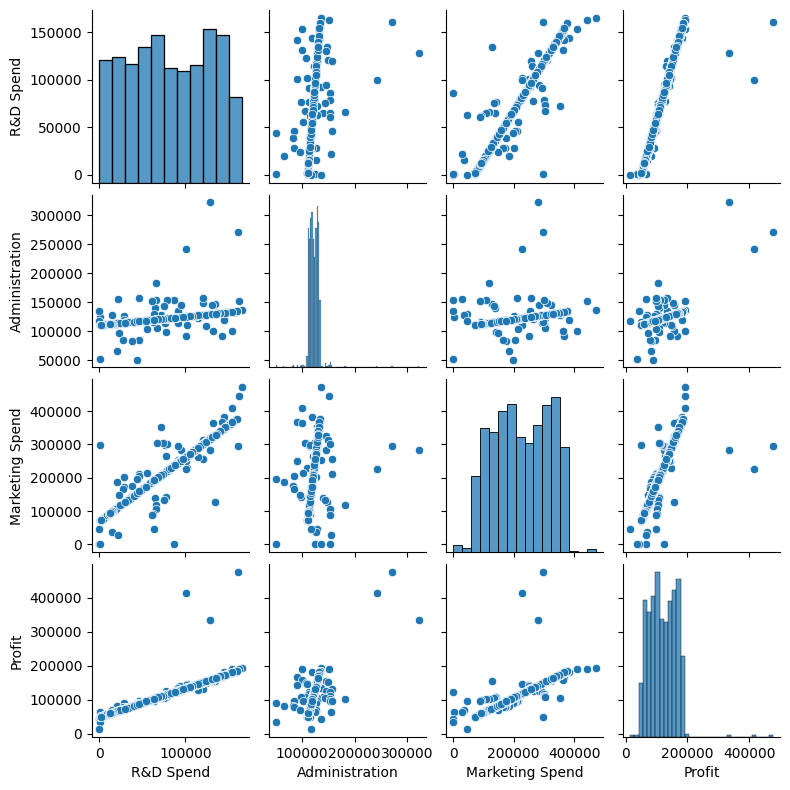

In [26]:
sns.pairplot(data, height=2)
plt.show()

In [27]:
y = data['Profit']

In [28]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
dummy = pd.get_dummies(data.State)

In [30]:
X = pd.concat([data,dummy], axis=1)

In [31]:
X.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,False,False,True
1,162597.70,151377.59,443898.53,California,191792.06,True,False,False
2,153441.51,101145.55,407934.54,Florida,191050.39,False,True,False
3,144372.41,118671.85,383199.62,New York,182901.99,False,False,True
4,142107.34,91391.77,366168.42,Florida,166187.94,False,True,False


In [32]:
X.drop(['State'], axis=1, inplace = True)

In [33]:
X = X.drop(['Profit'], axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,False,False,True
1,162597.70,151377.59,443898.53,True,False,False
2,153441.51,101145.55,407934.54,False,True,False
3,144372.41,118671.85,383199.62,False,False,True
4,142107.34,91391.77,366168.42,False,True,False


In [34]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

X = scale.fit_transform(X)
X

array([[1.        , 0.31665857, 1.        , 0.        , 0.        ,
        1.        ],
       [0.98335946, 0.37021423, 0.94089337, 1.        , 0.        ,
        0.        ],
       [0.92798459, 0.18442355, 0.8646636 , 0.        , 1.        ,
        0.        ],
       ...,
       [0.60644666, 0.70512215, 0.48145501, 1.        , 0.        ,
        0.        ],
       [0.77687845, 1.        , 0.59707888, 1.        , 0.        ,
        0.        ],
       [0.97479589, 0.81243308, 0.62622324, 0.        , 0.        ,
        1.        ]])

In [35]:
X.shape

(1000, 6)

## Split Data

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear regression model

In [37]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
print(model.coef_)

[ 8.81386643e+04  3.07933611e+05  3.91937017e+04  3.23875095e+02
 -5.50616391e+02  2.26741296e+02]


In [40]:
print(model.intercept_)

-24354.698051136525


In [41]:
r2_score(Y_test, y_pred)

0.982527784600816